<a href="https://colab.research.google.com/github/lynnqian/JSC270_Assg2/blob/YufanQian/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [122]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [123]:
income94.columns # see all the columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'gross_income_group'],
      dtype='object')

In [124]:
income94.head() # check the types

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
income94.info() # info before setting missing values to nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [126]:
income94 = income94.replace(' ?', np.nan) # replace all the missing values with NaN
income94.info() # info after setting missing values to nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [127]:
# see all the missing values
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

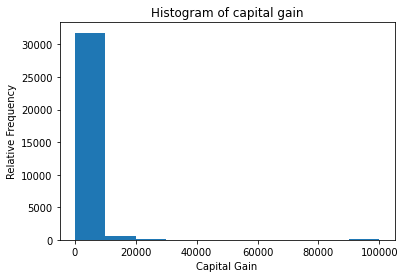

In [128]:
# plot of the inital values in captial_gain
plt.hist(income94.capital_gain)
plt.title('Histogram of capital gain')
plt.xlabel('Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

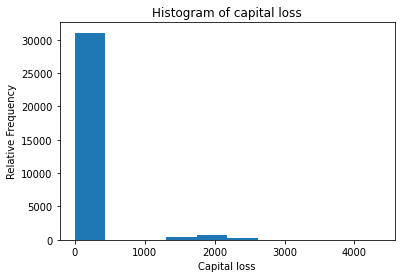

In [129]:
# plot of the inital values in captial_loss
plt.hist(income94.capital_loss)
plt.title('Histogram of capital loss')
plt.xlabel('Capital loss')
plt.ylabel('Relative Frequency')
plt.show()

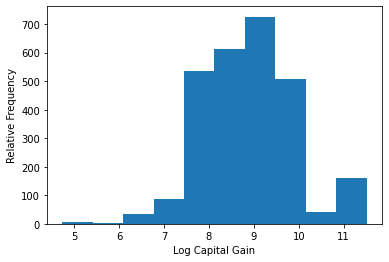

In [130]:
# plot the new variable created: log_captial_gain
income94['log_captial_gain'] = np.log((income94.capital_gain).replace(0, np.nan))
plt.hist(income94.log_captial_gain)
plt.xlabel('Log Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

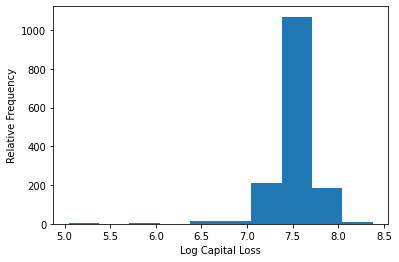

In [131]:
# plot the new variable created: log_captial_loss
income94['log_captial_loss'] = np.log((income94.capital_loss).replace(0, np.nan))
plt.hist(income94.log_captial_loss)
plt.xlabel('Log Capital Loss')
plt.ylabel('Relative Frequency')
plt.show()

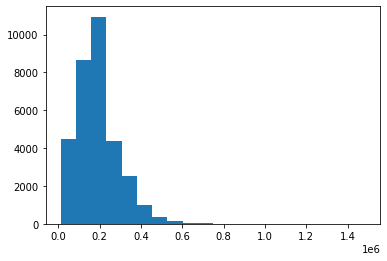

In [132]:
plt.hist(income94.fnlwgt, bins=20)
plt.show()

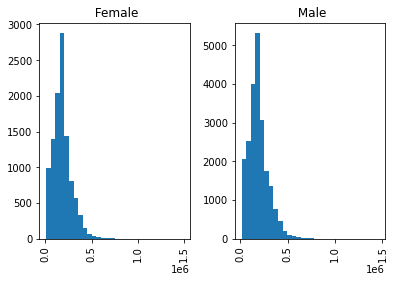

In [133]:
# we seperate into two graphs by sex
plot = income94.fnlwgt.hist(by = income94.sex, bins=30)

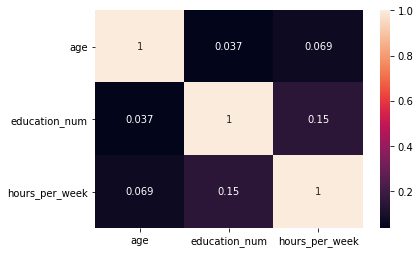

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [134]:
# heat map for the correlation between the three variables
df = pd.DataFrame(income94,columns=['age','education_num','hours_per_week'])
matrix = df.corr()
sns.heatmap(matrix, annot=True)
plt.show()
matrix

In [144]:
# the statistic test for the difference between hours_per_week and education_num
stats.ttest_ind(income94.education_num,income94.hours_per_week)

Ttest_indResult(statistic=-434.3097872965163, pvalue=0.0)

In [135]:
# the correlation between eduation_num and age for male and for female
df = pd.DataFrame(income94,columns=['sex','education_num', 'age'])
df.groupby('sex')[['education_num', 'age']].corr()

education_num       age
sex                                           
 Female education_num       1.000000 -0.017899
        age                -0.017899  1.000000
 Male   education_num       1.000000  0.060486
        age                 0.060486  1.000000

In [136]:
# function for calculating the weighted mean
def m(x, w):
    return np.average(x, weights=w)

# fucntion for calculating the weighted variance, with column x and weight w
def weighted_variance(x, w):
    mean = m(x, w)
    return m((x - mean)**2, w)

# fucntion for calculating the weighted covariance, with column x, y and weight w
def weighted_covariance(x, y, w):
    tot_weight = np.sum(w)
    nume = np.sum(w * (x - m(x, w)) * (y - m(y, w)))
    return nume / tot_weight

In [137]:
# the outcome for weighted variance and weighted covariance
print(weighted_variance(income94.education_num, income94.fnlwgt))
print(weighted_variance(income94.hours_per_week, income94.fnlwgt))
print(weighted_covariance(income94.education_num, income94.hours_per_week, income94.fnlwgt))

6.828646539770926
146.3306330028469
4.633888414261756


In [138]:
# the outcome for unweighted variance and weighted covariance
print(np.var(income94.education_num))
print(np.var(income94.hours_per_week))
print(np.cov(income94.education_num, income94.hours_per_week)[0][1])

6.618686630416274
152.45431279266475
4.705337944611544


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:46:28   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

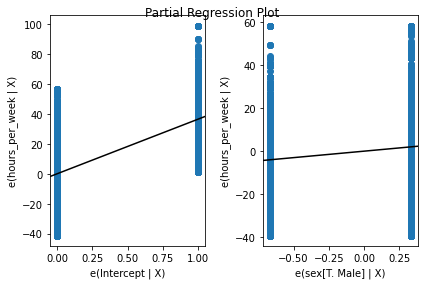

In [139]:
# linear regression between hours_per_week and sex
reg = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg.summary())
fig = sm.graphics.plot_partregress_grid(reg)                              

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:46:29   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

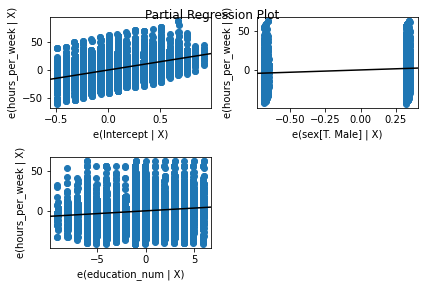

In [140]:
# linear regression for hours_per_week, with two independent variables: sex and education_num
reg = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg.summary())
fig = sm.graphics.plot_partregress_grid(reg)   

In [141]:
# create a new variable called 'gross_income_group_bin'
income94['gross_income_group_bin'] = (income94.gross_income_group == ' >50K').astype(int)
income94.gross_income_group_bin.value_counts()

0    24720
1     7841
Name: gross_income_group_bin, dtype: int64

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:46:31   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

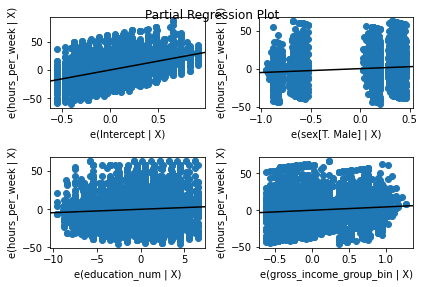

In [142]:
# linear regression for hours_per_week, with three variables: sex, education_num, and gross_income_group_bin
reg = smf.ols('hours_per_week ~ sex + education_num + gross_income_group_bin', data = income94).fit()
print(reg.summary())
fig = sm.graphics.plot_partregress_grid(reg)   